# 第一题代码：
运行后按照提示输入a, b, x0, y0, N，用空格分隔

In [33]:
import numpy as np
a, b, x0, y0, N = list(map(int, input("Input a, b, x0, y0, N with a space.\n").split()))
u = np.zeros((N+1, 2))
u[0] = np.array([x0, y0])
print(u[0])
for i in range(N):
    u[i+1] = np.array([1 - a * u[i][0]**2 + u[i][1], b * u[i][0]])
    
print(u)

[3. 4.]
[[ 3.0000000e+00  4.0000000e+00]
 [-4.0000000e+00  6.0000000e+00]
 [-9.0000000e+00 -8.0000000e+00]
 [-8.8000000e+01 -1.8000000e+01]
 [-7.7610000e+03 -1.7600000e+02]
 [-6.0233296e+07 -1.5522000e+04]]


---
# 第二题代码
你可以输入不同的轨迹长度N，代码会输出经典Hénon map（参数取值为 a=1.4, b=0.3, u0=(0, 0)）对应N的轨迹

[ 0.          1.         -0.4         1.076      -0.7408864   0.55432228
  0.34755162  0.99718771 -0.28787117  1.18313858 -1.046105  ]
[ 0.          0.          0.3        -0.12        0.3228     -0.22226592
  0.16629668  0.10426548  0.29915631 -0.08636135  0.35494157]


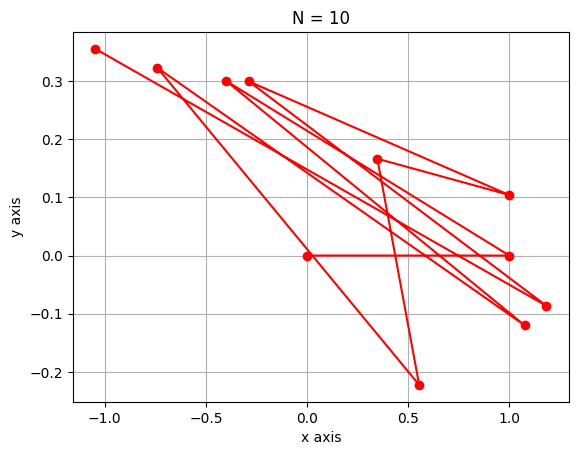

In [34]:
import matplotlib.pyplot as plt

a = 1.4
b = 0.3
x0, y0 = 0, 0
N = int(input("Input N.\n"))

u = np.zeros((N+1, 2))
u[0] = np.array([x0, y0])

for i in range(N):
    u[i+1] = np.array([1 - a * u[i][0]**2 + u[i][1], b * u[i][0]])

x = u[:, 0]
y = u[:, 1]
print(x)
print(y)

plt.plot(x, y, 'r-o')
# 添加标题和标签
plt.title('N = %d' % N)
plt.xlabel('x axis')
plt.ylabel('y axis')

# 显示图例
# plt.legend([''])

# 显示网格
plt.grid(True)

plt.show()

当你输入的N为1000时，输出图像如下：（需要运行下面代码来展示image）

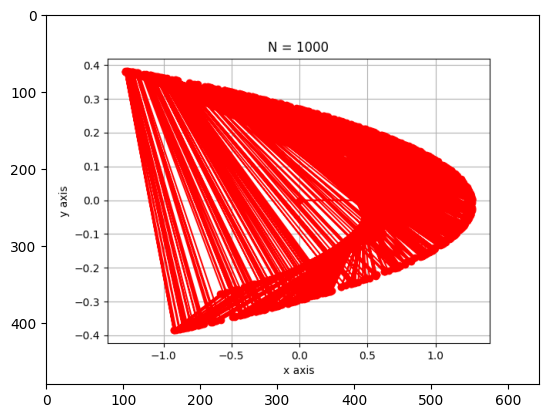

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img = mpimg.imread('Figure_1.png')
plt.imshow(img)

输入的N为10000时，输出图像如下：（需要运行下面代码来展示image）

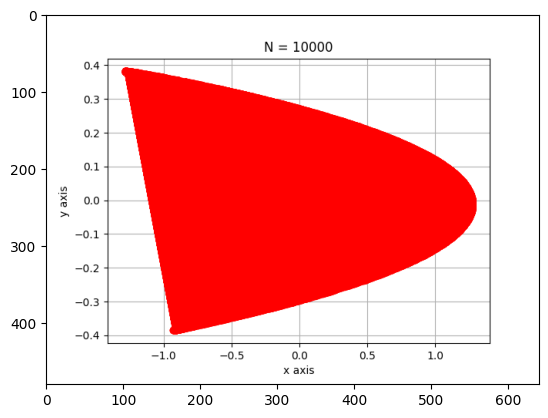

In [36]:
img = mpimg.imread('Figure_2.png')
plt.imshow(img)

可以看见行为是混沌的，(x,y)不会收敛到某个固定点。

---
# 第三题代码
将第一问的代码打包成函数：


In [37]:
def Henon_map (a_in_f, b, x0, y0, N):
    u = np.zeros((N+1, 2))
    u[0] = np.array([x0, y0])
    for i in range(N):
        u[i+1] = np.array([1 - a_in_f * u[i][0]**2 + u[i][1], b * u[i][0]])
    return u

取题目要求的参数如下：

In [38]:
b = 0.3
x0, y0 = 0,0

取a的范围为(-50,50),在其中均匀撒点，撒点数为200

In [75]:
a_range = 50
points = 200
a = np.linspace(-a_range, a_range, points) 
a

array([-50.        , -49.49748744, -48.99497487, -48.49246231,
       -47.98994975, -47.48743719, -46.98492462, -46.48241206,
       -45.9798995 , -45.47738693, -44.97487437, -44.47236181,
       -43.96984925, -43.46733668, -42.96482412, -42.46231156,
       -41.95979899, -41.45728643, -40.95477387, -40.45226131,
       -39.94974874, -39.44723618, -38.94472362, -38.44221106,
       -37.93969849, -37.43718593, -36.93467337, -36.4321608 ,
       -35.92964824, -35.42713568, -34.92462312, -34.42211055,
       -33.91959799, -33.41708543, -32.91457286, -32.4120603 ,
       -31.90954774, -31.40703518, -30.90452261, -30.40201005,
       -29.89949749, -29.39698492, -28.89447236, -28.3919598 ,
       -27.88944724, -27.38693467, -26.88442211, -26.38190955,
       -25.87939698, -25.37688442, -24.87437186, -24.3718593 ,
       -23.86934673, -23.36683417, -22.86432161, -22.36180905,
       -21.85929648, -21.35678392, -20.85427136, -20.35175879,
       -19.84924623, -19.34673367, -18.84422111, -18.34

先取N值较小为5，防止因为不收敛造成溢出int的范围导致轨迹无法显示

对每一个a值，计算最终点的位置x，并以 a 为横轴， x 为纵轴绘制orbit digram图

In [76]:
N = 5

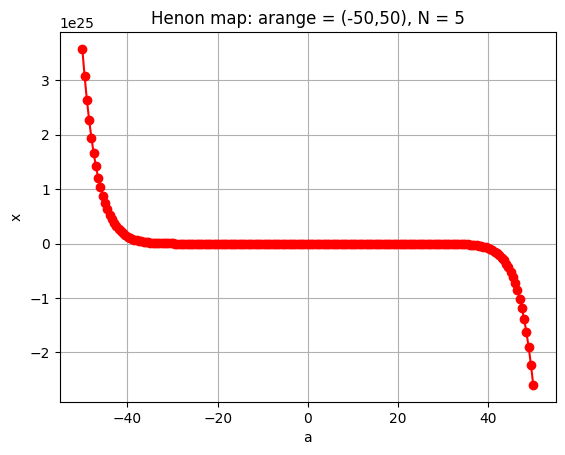

In [77]:
x = np.zeros(points)
for i in range(points): 
    x[i] = Henon_map(a[i], b, x0, y0, N)[N, 0]

#下面作图
plt.title('Henon map: arange = (-%d,%d), N = %d' % (a_range, a_range, N))
plt.plot(a, x, 'r-o')
plt.xlabel('a')
plt.ylabel('x')
plt.grid(True)

plt.show()

取N = 20：

C:\Users\zxj\AppData\Local\Temp\ipykernel_2756\715060748.py:5: RuntimeWarning: overflow encountered in scalar power
  u[i+1] = np.array([1 - a_in_f * u[i][0]**2 + u[i][1], b * u[i][0]])
C:\Users\zxj\AppData\Local\Temp\ipykernel_2756\715060748.py:5: RuntimeWarning: overflow encountered in scalar multiply
  u[i+1] = np.array([1 - a_in_f * u[i][0]**2 + u[i][1], b * u[i][0]])


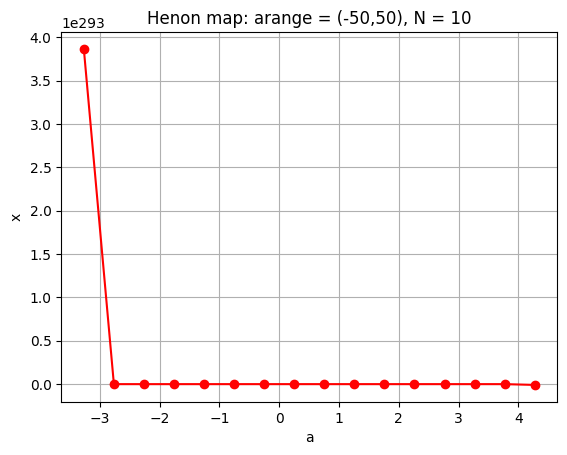

In [ ]:
N = 10

x = np.zeros(points)
for i in range(points): 
    x[i] = Henon_map(a[i], b, x0, y0, N)[N, 0]

#下面作图
plt.title('Henon map: arange = (-%d,%d), N = %d' % (a_range, a_range, N))
plt.plot(a, x, 'r-o')
plt.xlabel('a')
plt.ylabel('x')
plt.grid(True)

plt.show()

取N为100

C:\Users\zxj\AppData\Local\Temp\ipykernel_2756\715060748.py:5: RuntimeWarning: overflow encountered in scalar power
  u[i+1] = np.array([1 - a_in_f * u[i][0]**2 + u[i][1], b * u[i][0]])
C:\Users\zxj\AppData\Local\Temp\ipykernel_2756\715060748.py:5: RuntimeWarning: overflow encountered in scalar multiply
  u[i+1] = np.array([1 - a_in_f * u[i][0]**2 + u[i][1], b * u[i][0]])


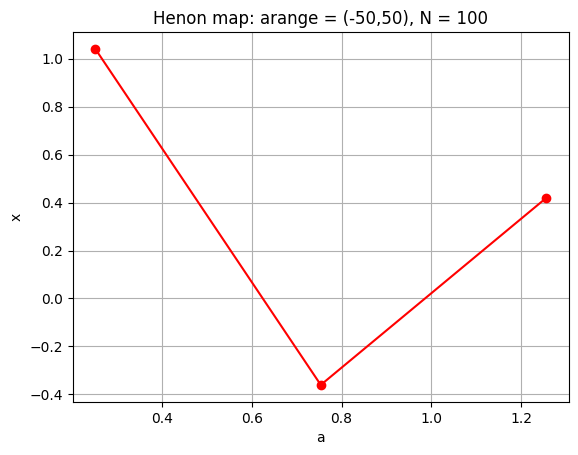

In [84]:
N = 100

x = np.zeros(points)
for i in range(points): 
    x[i] = Henon_map(a[i], b, x0, y0, N)[N, 0]

#下面作图
plt.title('Henon map: arange = (-%d,%d), N = %d' % (a_range, a_range, N))
plt.plot(a, x, 'r-o')
plt.xlabel('a')
plt.ylabel('x')
plt.grid(True)

plt.show()

这里只有三个点，是因为在所有的a值中只有三个a值对应轨迹的终点的x坐标不发散，而其他为无穷大无法显示。

---
# 第四题代码：
周期性轨道要求轨道上的点局限在有限的空间内，不能发散到无穷远处，我们利用这一点找周期性轨道解：

由第三题可见当N=100时在所有的a值中只有三个a值对应轨迹的终点的x坐标不发散而为有限值，这里找到第二个a点，大约是0.75，具体值通过下面代码可知：

In [18]:

print('a =', a[np.argmin(np.abs(x))])
print('x =', x[np.argmin(np.abs(x))])


a = 0.7537688442210992
x = -0.36019703804987224


可见精确值a = 0.7537688442210992

下面的代码计算该 a 值对应的Hénon map的轨迹并绘图

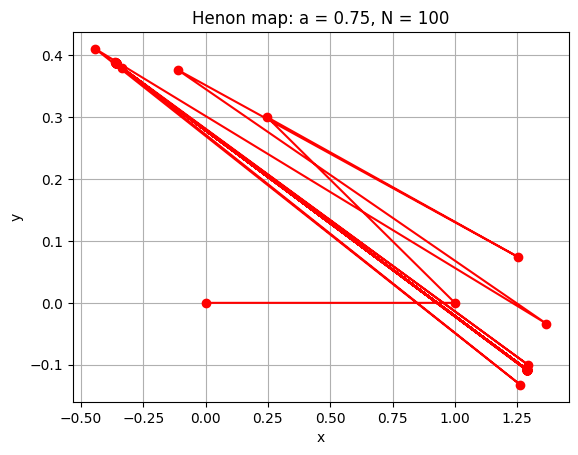

In [ ]:
a = 0.7537688442210992
N = 100

x = Henon_map(a, b, x0, y0, N)[:, 0]
y = Henon_map(a, b, x0, y0, N)[:, 1]

plt.plot(x, y, 'r-o')
plt.title('Henon map: a = %.2f, N = %d' % (a, N))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

继续取N = 1000，观察轨迹是怎么延伸的

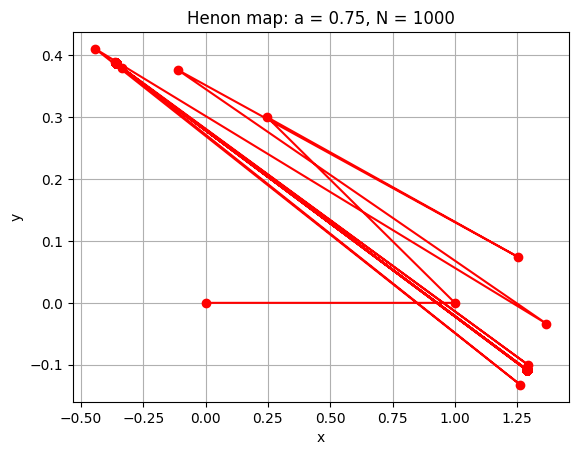

In [30]:
N = 1000

x = Henon_map(a, b, x0, y0, N)[:, 0]
y = Henon_map(a, b, x0, y0, N)[:, 1]

plt.plot(x, y, 'r-o')
plt.title('Henon map: a = %.2f, N = %d' % (a, N))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

发现多出来的900个点不见了，要么是溢出到无穷远处无法显示，要么是与原来的点重合了（也就是我们要的收敛解）。

下面具体打印出迭代过程中的轨迹上的各点坐标，可以验证后者猜想正确：

In [29]:
for i in range(100):
    print("u[", i, "] = (",x[i], ", ", y[i],")" ,sep='')

u[0] = (0.0, 0.0)
u[1] = (1.0, 0.0)
u[2] = (0.24623115577890076, 0.3)
u[3] = (1.2542991592390356, 0.07386934673367022)
u[4] = (-0.1120098348249265, 0.37628974777171065)
u[5] = (1.3668328107635395, -0.03360295044747795)
u[6] = (-0.44181797500507236, 0.41004984322906185)
u[7] = (1.262911810788674, -0.1325453925015217)
u[8] = (-0.33476617780015056, 0.3788735432366022)
u[9] = (1.2943998795690737, -0.10042985334004516)
u[10] = (-0.36334772888910427, 0.3883199638707221)
u[11] = (1.288806216065042, -0.10900431866673128)
u[12] = (-0.3610305467329708, 0.38664186481951257)
u[13] = (1.288393330391643, -0.10830916401989124)
u[14] = (-0.3595333151236517, 0.3865179991174929)
u[15] = (1.289082668953823, -0.10785999453709551)
u[16] = (-0.3604234071479733, 0.3867248006861469)
u[17] = (1.2888064345403032, -0.10812702214439197)
u[18] = (-0.36015367469148374, 0.38664193036209094)
u[19] = (1.288870069009997, -0.10804610240744512)
u[20] = (-0.3601963949625862, 0.38666102070299907)
u[21] = (1.288865963207489

可见最后轨迹收敛在了下面两个点处，在两个点之间来回跳动，周期为2

(-0.36019703804987274, 0.38665911141496406)

(1.2888637047165468, -0.10805911141496181)

可见当a = 0.7537688442210992时就是我们想要的周期性轨道。题目完成。